In [45]:
import glob
import cv2
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

script_path = os.path.realpath("data_preprocessing.ipynb")   # .ipynb file
#script_path = os.path.abspath(os.path.dirname(sys.argv[0])) # .py file

image_path = os.path.join(os.path.abspath(os.path.join(script_path, os.pardir, os.pardir)), 
                          'data/images/')
train_set = os.path.join(os.path.abspath(os.path.join(script_path, os.pardir, os.pardir)), 
                          'data/sets/train.txt')
val_set = os.path.join(os.path.abspath(os.path.join(train_set, os.pardir)), 'val.txt')
test_set = os.path.join(os.path.abspath(os.path.join(train_set, os.pardir)), 'test.txt')

export_path = os.path.join(os.path.abspath(os.path.join(image_path, os.pardir, os.pardir)), 'processed_images/')

In [46]:
images = []
with open(train_set) as f:
    for name in f:
        images.append(cv2.imread(os.path.join(image_path, name[:-1] + '.png'))) #name[:-1] to ignore "\n"

array_tensor = np.zeros([images[0].shape[0], images[0].shape[1], images[0].shape[2], len(images)])
for n, sample in enumerate(images):
    array_tensor[:,:,:,n] = sample

In [47]:
mean = array_tensor.mean(axis=(0,1,3))
print(mean)

[135.19350556 121.36561177 104.94353401]


In [48]:
stand = array_tensor.std(axis=(0,1,3))
print(stand)

[83.95363659 84.9644354  83.54141148]


In [50]:
array_tensor[:,:,:,0].mean()

133.46496078179246

In [51]:
x = np.zeros([202, 308, 3, 896])
for i in range(896):
    x[:,:,:,i] = (array_tensor[:,:,:,i] - mean)/stand

In [276]:
X = (array_tensor / 127.5) - 1

In [287]:
X = (array_tensor - array_tensor.min()) / array_tensor.std()

In [52]:
array_tensor.shape

(202, 308, 3, 896)

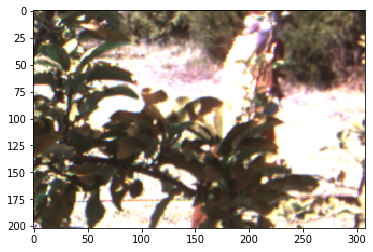

In [53]:
plt.imshow(array_tensor[...,0].astype(int))

In [54]:
array_tensor[201,0,:,0]

array([129., 182., 172.])

In [55]:
b = array_tensor[:,:,0,:]
g = array_tensor[:,:,1,:]
r = array_tensor[:,:,2,:]

In [57]:
rgb = np.concatenate((r,g,b), axis=2)

In [44]:
rgb.shape

(202, 308, 2688)

In [62]:
rgb = rgb.reshape(202,308,3,896)

In [64]:
rgb[201,0,:,0]

array([172., 182., 129.])

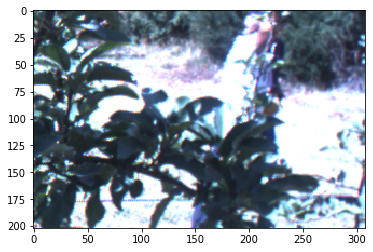

In [65]:
plt.imshow(rgb[...,0].astype(int))

In [72]:
array_tensor.mean(axis=(0,1,3))

array([135.19350556, 121.36561177, 104.94353401])